In [223]:
from sklearn.linear_model import SGDRegressor, LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [224]:
# Generate random data (1 feature)
X = np.random.rand(100, 1) * 10  # 100 samples, 1 feature

# True relationship (quadratic) plus some noise
y = 3 *X.flatten()**3 - 3 * X.flatten() + 1 + np.random.randn(100) * 5  # Quadratic relationship with noise


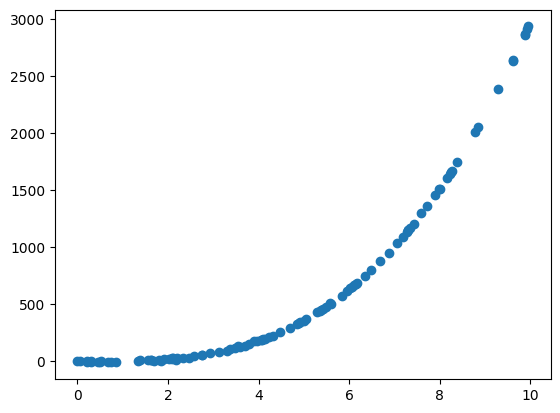

In [225]:
plt.scatter(X, y)
plt.show()

In [226]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures()),  # Step 1: Polynomial feature transformation
    ('sgd', SGDRegressor(max_iter=1000, eta0=0.1))  # Step 2: SGD Regressor
])


In [227]:
param_grid = {
    'poly__degree': [1, 2, 3, 4]         # Polynomial degree (1 for linear, 2 for quadratic, etc.)
}


In [228]:
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')


In [229]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('poly', PolynomialFeatures()),
                                       ('sgd', SGDRegressor(eta0=0.1))]),
             param_grid={'poly__degree': [1, 2, 3, 4]},
             scoring='neg_mean_squared_error')

In [230]:
print("Best Model:", grid_search.best_estimator_)


Best Model: Pipeline(steps=[('scaler', StandardScaler()),
                ('poly', PolynomialFeatures(degree=3)),
                ('sgd', SGDRegressor(eta0=0.1))])


In [231]:
results_df = pd.DataFrame(grid_search.cv_results_)
results_df


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_poly__degree,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002281,0.000367,0.001850,0.000353,1,{'poly__degree': 1},-156059.286510,-9.099439e+04,-101945.826452,-76983.365414,-1.274440e+05,-1.106854e+05,2.806986e+04,3
1,0.001602,0.001160,0.001445,0.001084,2,{'poly__degree': 2},-5002.047610,-3.654310e+03,-3883.477896,-2330.910540,-4.604014e+03,-3.894952e+03,9.200756e+02,2
2,0.001499,0.000442,0.001768,0.000839,3,{'poly__degree': 3},-24.266660,-3.731687e+01,-28.311218,-43.277037,-3.245396e+01,-3.312515e+01,6.674259e+00,1
3,0.001763,0.000925,0.000616,0.000825,4,{'poly__degree': 4},-96049.932372,-9.172416e+16,-207345.827161,-66.534636,-1.161667e+14,-1.836807e+16,3.667808e+16,4


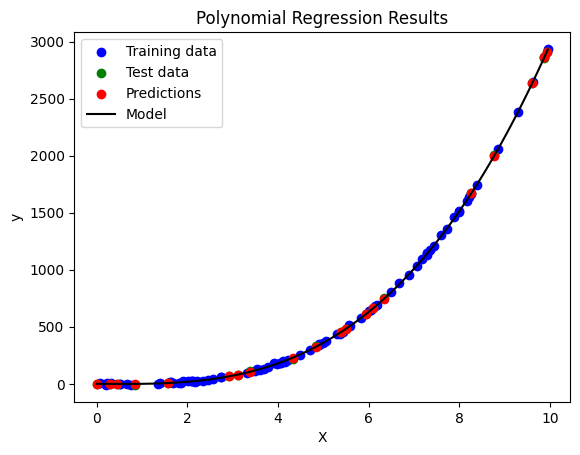

Model Coefficients (Weights): [140.00832475 509.71732597 303.04948752  59.00832057]
Model Intercept (Bias Term): [140.66252909]


In [232]:
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

# Plot the training data
plt.scatter(X_train, y_train, color='blue', label='Training data')

# Plot the test data
plt.scatter(X_test, y_test, color='green', label='Test data')

# Plot the predictions
plt.scatter(X_test, y_pred, color='red', label='Predictions')

# Plot the line result
X_line = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_line = best_model.predict(X_line)
plt.plot(X_line, y_line, color='black', label='Model')

plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Polynomial Regression Results')
plt.show()


sgd_model = best_model.named_steps['sgd']  # Access the SGDRegressor from the pipeline

# Print the coefficients (weights) and intercept (bias term)
print("Model Coefficients (Weights):", sgd_model.coef_)
print("Model Intercept (Bias Term):", sgd_model.intercept_)


In [233]:
print(np.random.random())

0.6004092759211672
